In [4]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import cv2
import imagesize
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model

In [10]:
data_dir = 'C:\\Users\\KARBAR\\Untitled Folder'
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [13]:
for image_class in ['boy', 'girl']: 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [14]:
data = tf.keras.utils.image_dataset_from_directory('C:\\Users\\KARBAR\\Untitled Folder')

Found 273 files belonging to 2 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [20]:
batch = data_iterator.next()

In [21]:
batch[1]

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0])

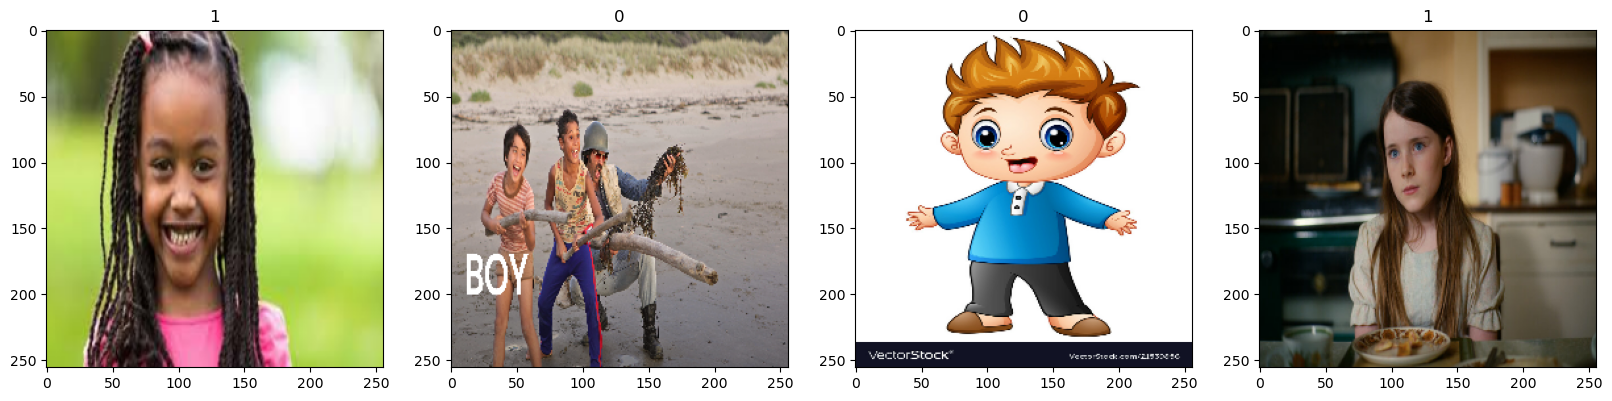

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [23]:
data = data.map(lambda x,y: (x/255, y))

In [24]:
data.as_numpy_iterator().next()

(array([[[[0.14901961, 0.10980392, 0.07058824],
          [0.14901961, 0.10980392, 0.07058824],
          [0.14678308, 0.1075674 , 0.06835172],
          ...,
          [0.12941177, 0.11764706, 0.09803922],
          [0.1304228 , 0.11865809, 0.09905025],
          [0.13333334, 0.12156863, 0.10196079]],
 
         [[0.14901961, 0.10980392, 0.07058824],
          [0.14901961, 0.10980392, 0.07058824],
          [0.14678308, 0.1075674 , 0.06835172],
          ...,
          [0.1203952 , 0.10863049, 0.08902265],
          [0.12250247, 0.11073776, 0.09112991],
          [0.12280944, 0.11104473, 0.09143689]],
 
         [[0.14901961, 0.10980392, 0.07058824],
          [0.14901961, 0.10980392, 0.07058824],
          [0.14678308, 0.1075674 , 0.06835172],
          ...,
          [0.10824656, 0.09648186, 0.07687402],
          [0.10947301, 0.09770831, 0.07810047],
          [0.11187194, 0.10010723, 0.08049939]],
 
         ...,
 
         [[0.15638787, 0.38431373, 0.5384191 ],
          [0.13377

In [44]:
train_size = int(len(data)*.56)
val_size = int(len(data)*.27)
test_size = int(len(data)*.27)

In [45]:
train_size

5

In [46]:
val_size

2

In [47]:
test_size

2

In [48]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [49]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [59]:
model = Sequential()

In [60]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [61]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [63]:
logdir='logs'

In [64]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [65]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 984ms/step - accuracy: 0.5132 - loss: 0.7376 - val_accuracy: 0.5000 - val_loss: 0.7163
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 911ms/step - accuracy: 0.4679 - loss: 0.7183 - val_accuracy: 0.6406 - val_loss: 0.6729
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 947ms/step - accuracy: 0.6307 - loss: 0.6665 - val_accuracy: 0.6406 - val_loss: 0.6324
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 905ms/step - accuracy: 0.6493 - loss: 0.6235 - val_accuracy: 0.7344 - val_loss: 0.5513
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 933ms/step - accuracy: 0.7379 - loss: 0.5479 - val_accuracy: 0.8125 - val_loss: 0.4637
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 914ms/step - accuracy: 0.7439 - loss: 0.5433 - val_accuracy: 0.7031 - val_loss: 0.5548
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 914ms/step - accuracy: 0.7821 - loss: 0.4853 - val_accuracy: 0.7812 - val_loss: 0.4375
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 938ms/step - accuracy: 0.8853 - loss: 0.3830 - val_accuracy: 0.8594 - val_loss

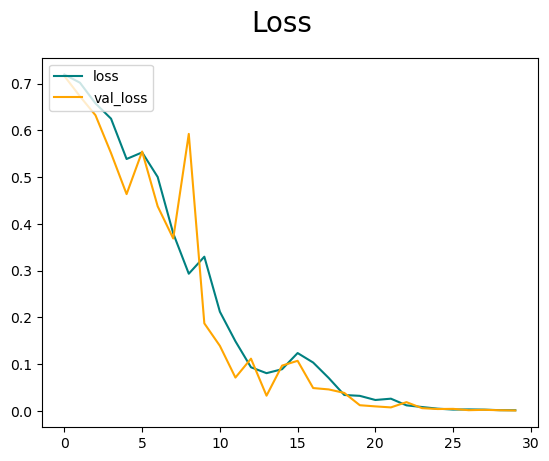

In [66]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

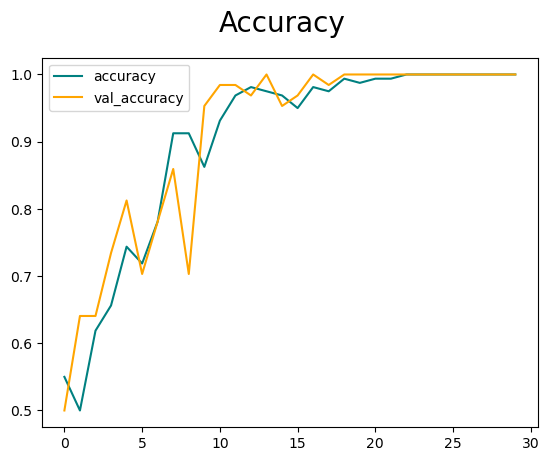

In [67]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [68]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [69]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


In [70]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


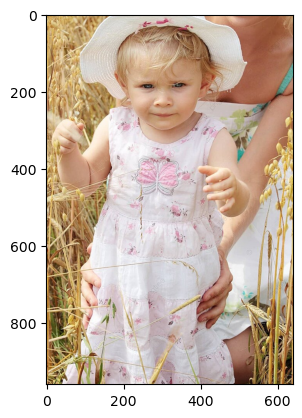

In [80]:
img = cv2.imread(os.path.join(data_dir, 'g2.jpg'))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

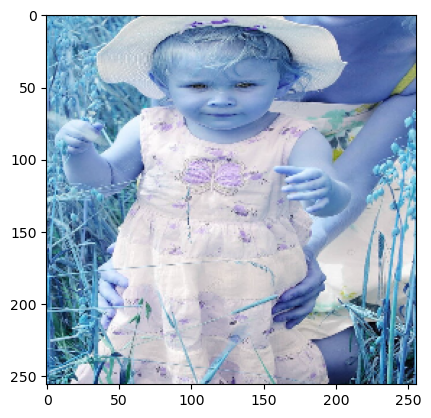

In [81]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [82]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [83]:
yhat

array([[0.99997824]], dtype=float32)

In [84]:
np.where(yhat>0.5, 'she is a daghter', 'he is a boy')

array([['she is a daghter']], dtype='<U16')

In [86]:
model.save(os.path.join(data_dir,'models','imageclassifier.keras'))